<a href="https://colab.research.google.com/github/nemanja899/Deforestation-U-NET/blob/master/GeospatialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geemap

      Successfully uninstalled notebook-5.7.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.7.16, but you have notebook 6.5.2 which is incompatible.
google-colab 1.0.0 requires tornado~=6.0.4, but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import ee
import geemap
ee.Authenticate()
ee.Initialize()



To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=f2GtbxkdOj2IKkyK_ICn3bIsIzFH24o-xiDXoQdeE9Q&tc=cPLg5DxWLZ4xhEBas5SVfHoXvgRH2A_F7bkQZsa1fu8&cc=UxAV3aO66D7BTsSlh1AR0DmJ5bl_44zK4E7Y0ASdkh0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvu_1yYX7YOGSgnVe0LEIeBW3LTcSv8vEAcMb3TjiVTUcghnyp_ayWo

Successfully saved authorization token.


In [ ]:
pip install geopandas

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import geopandas as gpd
exploited_minerals= gpd.read_file("http://gis.mre.gov.rs/arcgis/rest/services/OpenData/CISGIR/MapServer/51/query?where=1%3D1&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&returnDistinctValues=false&resultOffset=&resultRecordCount=&queryByDistance=&returnExtentsOnly=false&datumTransformation=&parameterValues=&rangeValues=&f=geojson")

In [ ]:
exploited_minerals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
exploited_minerals.crs=3857

In [ ]:
exploited_minerals.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
exploited_minerals.head()

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry
0,1,RO Rudnik magnezita Magnezit Titovo Uzice,Slovići,1988.0,352,magnezit,0.0,335500.0,2452.493781,Čajetina,Čajetina (100%),"POLYGON ((19.747 43.749, 19.747 43.754, 19.740..."
1,2,"Rudnik magnezita Bogutovac, Kraljevo",Kozjak,1971.0,258,magnezit,0.0,7750000.0,12000.000000,Kraljevo,Kraljevo (100%),"POLYGON ((20.418 43.658, 20.393 43.658, 20.393..."
2,3,"MAGNOHROM doo, Kraljevo",Stublo na Zlatiboru,1978.0,313,magnezit,0.0,1100000.0,4200.000000,Čajetina,Čajetina (100%),"POLYGON ((19.603 43.635, 19.603 43.626, 19.617..."
3,4,"Rudnik magnezita i hromita MAGNEZIT, Titivo Užice",Užice,1965.0,192,magnezit,0.0,40000.0,800.000000,Čajetina,Čajetina (100%),"POLYGON ((19.565 43.866, 19.565 43.864, 19.568..."
4,5,"Rudnik magnezita i hromita MAGNEZIT, Titovo Užice",Tornik,1966.0,197,magnezit,0.0,49979.5,1033.985188,Čajetina,Čajetina (100%),"POLYGON ((19.627 43.663, 19.628 43.661, 19.630..."


In [ ]:
srb_shape=gpd.read_file("./drive/MyDrive/ColabNotebooks/SrbMaps/SrbShape/stanford-nw576pv0116-geojson.json")

In [ ]:
srb_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
srb_shape.crs=3857

In [ ]:
exploited_minerals["Area"]=exploited_minerals.geometry.map(lambda x:x.area*10**10)

In [ ]:
exploited_minerals.sort_values("Area",ascending=False).head(3)

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
481,482,Javno preduzeće Elektroprivreda Srbije,polje A,1979,321,ugalj,0,1.141360e+08,49935.501293,Beograd-Lazarevac,Beograd-Lazarevac (100%),"POLYGON ((20.266 44.440, 20.266 44.404, 20.336...",1.289606e+08
138,139,Rudnici i industrija vatrostalnog materijala M...,Divčibare,1965,190,magnezit,0,9.599764e+07,40245.746711,Požega,"Požega (28%), Kosjerić (26%), Mionica (25%), V...","POLYGON ((20.070 44.151, 19.920 44.150, 19.921...",1.079269e+08
366,367,"JP Elektroprivreda Srbije, Ogranak RB Kolubara",Zapadno polje,1990,321A,ugalj,500,8.675550e+07,39403.107507,Ub,"Ub (58%), Lajkovac (21%), Beograd-Lazarevac (2...","POLYGON ((20.164 44.512, 20.165 44.505, 20.127...",9.813240e+07


In [ ]:
exploited_minerals.sort_values("Area").head(3)

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
466,467,"Karamela Kop, Baljevac",Voznik-Rudno,2021,632,mermerisani krečnjak kao PGM,0,1666.5,167.479688,Kraljevo,Kraljevo (100%),"POLYGON ((20.503 43.408, 20.504 43.408, 20.503...",1852.133732
154,155,"Industrijsko preduzeće 26 septembar, Krupanj",,1961,68,*,0,3964.5,256.607227,Negotin,Negotin (100%),"POLYGON ((22.453 44.375, 22.454 44.374, 22.454...",4475.874103
93,94,"Mannes doo, Kragujevac",Korman,2006,474,dolomitski mermer,0,5088.5,350.039783,Kragujevac-Grad,Kragujevac-Grad (100%),"POLYGON ((21.003 44.045, 21.003 44.045, 21.003...",5715.116131


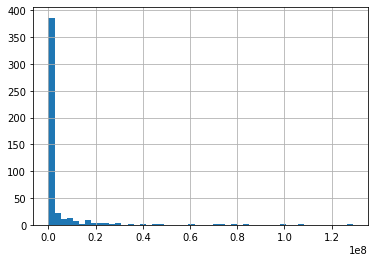

In [ ]:
exploited_minerals.Area.hist(bins=50)

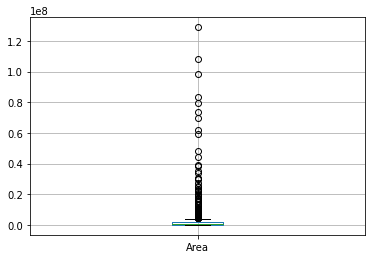

In [ ]:
exploited_minerals.boxplot("Area")

In [ ]:
exploited_minerals.Area.quantile(0.95)

21762012.884875484

In [ ]:
filter_ext_min=exploited_minerals.loc[exploited_minerals.Area>21937707.497158628]
filter_ext_min.shape

(24, 13)

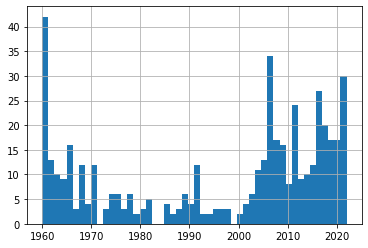

In [ ]:
exploited_minerals.loc[exploited_minerals.IZDATO>0].IZDATO.hist(bins=50)

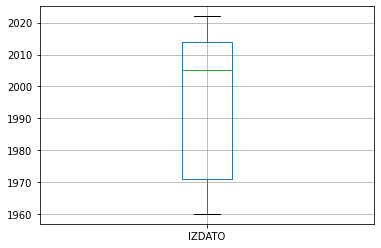

In [ ]:
exploited_minerals.loc[exploited_minerals.IZDATO>0].boxplot("IZDATO")

In [ ]:
filter_ext_min=filter_ext_min.loc[filter_ext_min.IZDATO>2014]
filter_ext_min.shape

(6, 13)

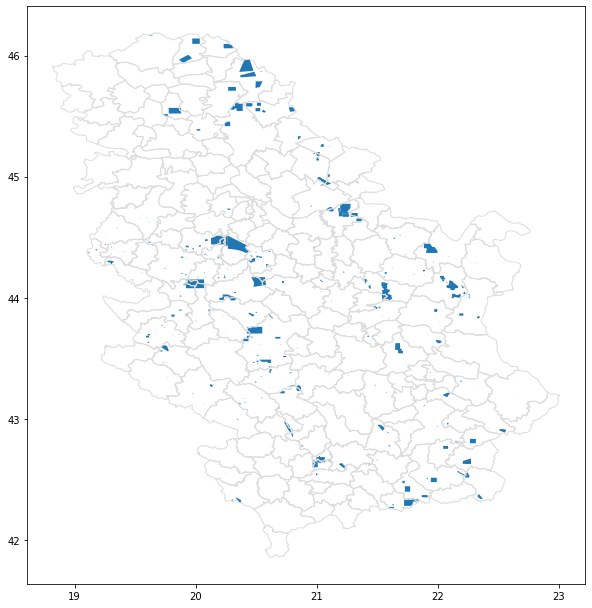

In [ ]:
ax = srb_shape.plot(figsize=(10,15), color='none', edgecolor='gainsboro', zorder=3)
exploited_minerals.plot(ax=ax)

In [ ]:
srb_boundary=gpd.read_file("./drive/MyDrive/ColabNotebooks/SrbMaps/SrbShape/serbian-boundary.json")

In [ ]:
srb_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
srb_boundary.crs=3857

In [ ]:
srb_boundary["Area"]=srb_boundary.geometry.area*10**9
srb_boundary

In [ ]:
exploited_minerals["SIROVINA"].value_counts()

krečnjak                75
magnezit                32
krečnjak kao TGK        20
lignit                  18
mermer                  18
                        ..
opekarksa sirovina       1
laporac                  1
kaolinitisani granit     1
andezit - bazalt         1
mermerni oniks           1
Name: SIROVINA, Length: 139, dtype: int64

In [ ]:
exploited_minerals.shape

(479, 13)

In [ ]:
exploited_minerals.SIROVINA.unique()

array(['magnezit', 'Cu', 'Pb, Zn', 'nafta', 'kameni ugalj', 'mrki ugalj',
       'lignit', 'ugalj', 'krečnjak', 'gline', 'granati (grupa)',
       'mermeri i kalkšisti', 'peskovi', 'kvarc (grupa)', 'graniti',
       'mermerni oniks (biolit)', 'dolomit',
       'laporci i lapori, cementni laporci', 'glina', 'mermer',
       'opekarska glina', 'vatrostalna glina', 'kvarcni pesak',
       'keramičke i kaolinske gline', 'keramička glina', 'ukrasni kamen',
       'barit', 'laporac', 'mermerisani krečnjak', 'kaolinisani graniti',
       'bazalt', 'granit', 'zeolitski tuf', 'dolomitski mermer',
       'granodiorit', 'mermer CaCO3 punilo', 'dacit', 'dijabaz',
       'borni minerali', 'andezit', '*', 'tufovi', 'opekarske gline',
       'kalcit', 'Sb, Pb, Zn', 'andeziti', 'peščari', 'daciti', 'Pb',
       'vatrostalne gline', 'Cr', 'kvarcna stena', 'felspad i kvarc',
       'kvarc', 'Pb, Zn, Au', 'železna troska', 'Fe',
       'dijatomejska zemlja', 'živa', 'krecnjak', 'olovo-cink',
       'kvar

In [ ]:
from folium.map import Marker
import folium
map_srb = folium.Map(location=[43.7516, 21.1790], zoom_start=8)

for _,r in exploited_minerals.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.01)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'yellow'})
    folium.Popup("<b>Sirovina:</b><br>"+str(r['SIROVINA'])+"<br>"+
                 "<b>Nalaziste:</b><br>"+r["LEZISTE"]+"<br>"+
                 "<b>Povrsina:</b><br>"+
                 str(r["Area"])+"<var>m<sup>2</sup></var>").add_to(geo_j)
    
    geo_j.add_to(map_srb)
map_srb

In [ ]:
map_srb.crs

'EPSG3857'

In [ ]:
exploited_minerals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          479 non-null    int64   
 1   PODNOSILAC        479 non-null    object  
 2   LEZISTE           479 non-null    object  
 3   IZDATO            476 non-null    float64 
 4   LIST              479 non-null    object  
 5   SIROVINA          476 non-null    object  
 6   Zastitni_prostor  476 non-null    float64 
 7   Shape.STArea()    479 non-null    float64 
 8   Shape.STLength()  479 non-null    float64 
 9   Opstina           475 non-null    object  
 10  Ops_komentar      475 non-null    object  
 11  geometry          479 non-null    geometry
 12  Area              479 non-null    float64 
dtypes: float64(5), geometry(1), int64(1), object(6)
memory usage: 48.8+ KB


In [ ]:
filter_ext_min.SIROVINA.unique()

array(['gas', 'gas i kondenzat', 'bakar', 'slobodni gas',
       'nafta, rastvoreni gas i slobodni gas', None], dtype=object)

In [ ]:
filter_ext_min

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
344,345,"NIS ad, Novi Sad","Martonoš - zapad, G-4",2015,63,gas,0,23520000.0,19400.000000,Kanjiža,Kanjiža (100%),"POLYGON ((19.973 46.096, 20.035 46.097, 20.034...",2.737589e+07
370,371,"NIS ad, Novi Sad",Majdan - ležište Pz-1,2016,66,gas i kondenzat,500,21915403.5,18742.335992,Žitište,Žitište (100%),"POLYGON ((20.231 46.096, 20.232 46.060, 20.309...",2.549330e+07
403,404,SERBIA ZIJIN BOR COPPER DOO BOR,Veliki Krivelj,2018,26 B,bakar,0,39211680.0,29413.572650,Bor,Bor (100%),"POLYGON ((22.104 44.079, 22.104 44.065, 22.127...",4.407029e+07
410,411,"NIS ad, Novi Sad",Melenci,2018,75,slobodni gas,500,33587500.0,24400.000000,Zrenjanin,"Zrenjanin (99%), Kikinda (1%)","POLYGON ((20.325 45.607, 20.326 45.562, 20.339...",3.872145e+07
411,412,"NIS ad, Novi Sad",Velebit,2018,77,"nafta, rastvoreni gas i slobodni gas",500,29394687.0,22652.653699,Kanjiža,Kanjiža (100%),"POLYGON ((19.863 45.967, 19.896 45.938, 19.970...",3.412317e+07
415,416,"NIS ad, Novi Sad",Turija sever,2018,79,None,500,41600000.0,26400.000000,Srbobran,"Srbobran (95%), Bečej (5%)","POLYGON ((19.778 45.520, 19.881 45.522, 19.880...",4.792638e+07


In [ ]:
map_exploating = folium.Map(location=[43.7516, 21.1790], zoom_start=8)

for _,r in filter_ext_min.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.01)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'yellow'})
    folium.Popup("<b>Sirovina:</b><br>"+str(r['SIROVINA'])+"<br>"+
                 "<b>Nalaziste:</b><br>"+r["LEZISTE"]+"<br>"+
                 "<b>Povrsina:</b><br>"+
                 str(r["Area"])+"<var>m<sup>2</sup></var>").add_to(geo_j)
    
    geo_j.add_to(map_exploating)
map_exploating

In [ ]:
sirovina="bakar"
row=filter_ext_min.loc[filter_ext_min.SIROVINA==sirovina]
row

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
403,404,SERBIA ZIJIN BOR COPPER DOO BOR,Veliki Krivelj,2018,26 B,bakar,0,39211680.0,29413.57265,Bor,Bor (100%),"POLYGON ((22.104 44.079, 22.104 44.065, 22.127...",4.407029e+07


In [ ]:
leziste="Velebit"
row2=filter_ext_min.loc[filter_ext_min.LEZISTE==leziste]
row2

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
411,412,"NIS ad, Novi Sad",Velebit,2018,77,"nafta, rastvoreni gas i slobodni gas",500,29394687.0,22652.653699,Kanjiža,Kanjiža (100%),"POLYGON ((19.863 45.967, 19.896 45.938, 19.970...",3.412317e+07


In [ ]:
Marker([row.geometry.centroid.y,row.geometry.centroid.x]).add_to(map_exploating)
Marker([row2.geometry.centroid.y,row2.geometry.centroid.x]).add_to(map_exploating)

map_exploating

In [ ]:
row.geometry.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
poly_json1=row.geometry.to_json()
poly_json2=row2.geometry.to_json()
print(poly_json1)

{"type": "FeatureCollection", "features": [{"id": "403", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[22.104261893686957, 44.079465644381926], [22.104286336924698, 44.06466843303033], [22.12704147866007, 44.060035912125365], [22.148929534450982, 44.07205869197353], [22.139263496053744, 44.07904094331468], [22.168226878232655, 44.078883437317394], [22.168536896573514, 44.09463125359699], [22.156225913119535, 44.10375706720663], [22.129091322934528, 44.12516171937212], [22.12510359561116, 44.12770320590431], [22.124629956629292, 44.129741983946], [22.125023930191762, 44.13008912420276], [22.12509009333457, 44.13225759332305], [22.123171962928176, 44.1345715959588], [22.120916781849562, 44.13559280230627], [22.1170678823446, 44.13693557665033], [22.113892198567765, 44.137533618155665], [22.107898890200204, 44.13984202487467], [22.1026984628188, 44.14448259148011], [22.09436473885069, 44.13586826029055], [22.094032460723053, 44.117870421852885], [2

In [ ]:
pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geojson 
gjson1=geojson.loads(poly_json1)
gjson2=geojson.loads(poly_json2)


In [ ]:
gjson1['features'][0]["geometry"]["coordinates"]

[[[22.104262, 44.079466],
  [22.104286, 44.064668],
  [22.127041, 44.060036],
  [22.14893, 44.072059],
  [22.139263, 44.079041],
  [22.168227, 44.078883],
  [22.168537, 44.094631],
  [22.156226, 44.103757],
  [22.129091, 44.125162],
  [22.125104, 44.127703],
  [22.12463, 44.129742],
  [22.125024, 44.130089],
  [22.12509, 44.132258],
  [22.123172, 44.134572],
  [22.120917, 44.135593],
  [22.117068, 44.136936],
  [22.113892, 44.137534],
  [22.107899, 44.139842],
  [22.102698, 44.144483],
  [22.094365, 44.135868],
  [22.094032, 44.11787],
  [22.093866, 44.108871],
  [22.072851, 44.10034],
  [22.071044, 44.090187],
  [22.077747, 44.081123],
  [22.093286, 44.077375],
  [22.104262, 44.079466]]]

In [ ]:
import folium


def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

In [ ]:
def maskS2clouds(image) :
  qa = image.select('QA60');

  #Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) and (qa.bitwiseAnd(cirrusBitMask).eq(0));

  return image.updateMask(mask)


In [ ]:
def rescale_min_max(image):
 return image.unitScale(0,4000)

In [ ]:
def upscale_img(image):
  return image.multiply(10000).uint16()


In [ ]:

poly = ee.Geometry.Polygon(gjson1['features'][0]["geometry"]["coordinates"],None,geodesic=False)

def clipcol(image):
    clipimage = image.clip(poly)
    return clipimage
      
sentinel = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterDate('2015-01-01','2022-10-01')\
    .filterBounds(poly)\
    .map(clipcol)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 1))\
    .filter(ee.Filter.lt('DARK_FEATURES_PERCENTAGE', 10))\
    .select(['B4', 'B3', 'B2'])\
    #.map(rescale_min_max)\
    #.map(upscale_img)
    

In [ ]:
poly2 = ee.Geometry.Polygon(gjson2['features'][0]["geometry"]["coordinates"],None,geodesic=False)

def clipcol(image):
    clipimage = image.clip(poly2)
    return clipimage
      
sentinel2 = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterDate('2015-01-01','2022-10-01')\
    .filterBounds(poly2)\
    .map(clipcol)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 1))\
    .filter(ee.Filter.lt('DARK_FEATURES_PERCENTAGE', 10))\
    .select(['B4', 'B3', 'B2'])\

In [ ]:
geemap.ee_export_image_collection(sentinel, out_dir="./drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/"+sirovina)

Total number of images: 79

Exporting 1/79: 20170402T093031_20170402T093030_T34TEP.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/bakar/20170402T093031_20170402T093030_T34TEP.tif


Exporting 2/79: 20170519T092031_20170519T092031_T34TEP.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/bakar/20170519T092031_20170519T092031_T34TEP.tif


Exporting 3/79: 20170711T093031_20170711T093606_T34TEP.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/bakar/20170711T093031_20170711T093606_T34TEP.tif


Exporting 4/79: 20170721T093041_20170721T093220_T34TEP.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/bakar/20170721T093041_20170721T093220_T34TEP.tif


Exporting 5/79: 20170827T092031_2017

In [ ]:
row2

,OBJECTID,PODNOSILAC,LEZISTE,IZDATO,LIST,SIROVINA,Zastitni_prostor,Shape.STArea(),Shape.STLength(),Opstina,Ops_komentar,geometry,Area
411,412,"NIS ad, Novi Sad",Velebit,2018,77,"nafta, rastvoreni gas i slobodni gas",500,29394687.0,22652.653699,Kanjiža,Kanjiža (100%),"POLYGON ((19.863 45.967, 19.896 45.938, 19.970...",3.412317e+07


In [ ]:
<geemap.ee_export_image_collection(sentinel2, out_dir="./drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/nafta, rastvoreni gas i slobodni gas")

Total number of images: 82

Exporting 1/82: 20170704T094031_20170704T094030_T34TDR.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/nafta, rastvoreni gas i slobodni gas/20170704T094031_20170704T094030_T34TDR.tif


Exporting 2/82: 20170704T094031_20170704T094030_T34TDS.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/nafta, rastvoreni gas i slobodni gas/20170704T094031_20170704T094030_T34TDS.tif


Exporting 3/82: 20170803T094031_20170803T094046_T34TDR.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Collection/nafta, rastvoreni gas i slobodni gas/20170803T094031_20170803T094046_T34TDR.tif


Exporting 4/82: 20170803T094031_20170803T094046_T34TDS.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/ColabNotebooks/Dataset/Sentinel-POI-Colle

In [ ]:

map_exploating.add_ee_layer(
    sentinel.first(),{'bands': ["B4","B3","B2"],'min': 0, 'max': 4000}, 'first')
map_exploating.add_ee_layer(
    sentinel2.first(),{'bands': ["B4","B3","B2"],'min': 0, 'max': 4000}, 'first')
#Marker([44.098,22.119]).add_to(map_exploating)
map_exploating

Mora se pokrenuti celija da bi se prikazale raster slike!

In [ ]:
import folium
from folium.map import Marker
test_map=folium.Map([44.098,22.119],zoom_start=8)

first = (ee.ImageCollection('COPERNICUS/S2_SR')
         .filterBounds(ee.Geometry.Point(22.119064,44.097557))
         .filterDate('2017-01-01', '2019-12-31')
         .sort('CLOUDY_PIXEL_PERCENTAGE')
         .first())

second = (ee.ImageCollection('COPERNICUS/S2_SR')
         .filterBounds(ee.Geometry.Point(19.916698,45.972193))
         .filterDate('2017-01-01', '2019-12-31')
         .sort('CLOUDY_PIXEL_PERCENTAGE')
         .first())

test_map.add_ee_layer(
    first,{'bands': ["B4","B3","B2"],'min': 0, 'max': 3000}, 'first')

test_map.add_ee_layer(
    second,{'bands': ["B4","B3","B2"],'min': 0, 'max': 3000}, 'second')
Marker([44.098,22.119]).add_to(test_map)
Marker([row2.geometry.centroid.y,row2.geometry.centroid.x]).add_to(test_map)

test_map

In [ ]:
uri = ('gs://gcp-public-data-landsat/LC08/01/001/002/'
       'LC08_L1GT_001002_20160817_20170322_01_T2/'
       'LC08_L1GT_001002_20160817_20170322_01_T2_B5.TIF')
cloud_image = ee.Image.loadGeoTIFF(uri)
print(cloud_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'B0', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [8991, 8971], 'crs': 'EPSG:32630', 'crs_transform': [30, 0, 342000, 0, -30, 9016200]}]}


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
#plt.imshow()
type(first.visualize())

ee.image.Image

In [ ]:
from pprint import pprint

print('Create a constant image:')
image_1 = ee.Image(1)
pprint(image_1.getInfo())

print('\nConcatenate two images into one multi-band image:')
image_2 = ee.Image(2)
image_3 = ee.Image.cat([image_1, image_2])
pprint(image_3.getInfo())

print('\nCreate a multi-band image from a list of constants:')
multiband = ee.Image([1, 2, 3])
pprint(multiband.getInfo())

print('\nSelect and (optionally) rename bands:')
renamed = multiband.select(
    ['constant', 'constant_1', 'constant_2'],  # old names
    ['band1', 'band2', 'band3'])               # new names
pprint(renamed.getInfo())

print('\nAdd bands to an image:')
image_4 = image_3.addBands(ee.Image(42))
pprint(image_4.getInfo())

Create a constant image:
{'bands': [{'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'max': 1,
                          'min': 1,
                          'precision': 'int',
                          'type': 'PixelType'},
            'id': 'constant'}],
 'type': 'Image'}

Concatenate two images into one multi-band image:
{'bands': [{'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'max': 1,
                          'min': 1,
                          'precision': 'int',
                          'type': 'PixelType'},
            'id': 'constant'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'max': 2,
                          'min': 2,
                          'precision': 'int',
                          'type': 'PixelType'},
            'id': 'constant_1'}],
 'type': 'Image'}

Create a multi-band image from a list of constant

In [ ]:
image = ee.Image('CGIAR/SRTM90_V4')


map_s3 = folium.Map(location=[43.7516, 21.1790], zoom_start=11)
folium.LatLngPopup().add_to(map_s3)
map_s3.add_ee_layer(image,{'min':0, 'max':3000},"slope")# {'bands': ["B1","B4"], 'min': 0, 'max': 2000}, 'first'))
display(map_s3)

In [ ]:
print('SRTM image', image)

SRTM image ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "CGIAR/SRTM90_V4"
      }
    }
  }
})


In [ ]:
map_s3.add_ee_layer(image, {"min": 0, "max": 3000, "palette": ['blue', 'green', 'red']},
    'custom palette');
display(map_s3)

In [ ]:
# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwi_viz = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}

# Define a map centered on San Francisco Bay.
map_ndwi = folium.Map(location=[37.5010, -122.1899], zoom_start=10)

# Add the image layer to the map and display it.
map_ndwi.add_ee_layer(ndwi, ndwi_viz, 'NDWI')
display(map_ndwi)

In [ ]:
# Mask the non-watery parts of the image, where NDWI < 0.4.
ndwi_masked = ndwi.updateMask(ndwi.gte(0.4))

# Define a map centered on San Francisco Bay.
map_ndwi_masked = folium.Map(location=[37.5010, -122.1899], zoom_start=10)

# Add the image layer to the map and display it.
map_ndwi_masked.add_ee_layer(ndwi_masked, ndwi_viz, 'NDWI masked')
display(map_ndwi_masked)

In [ ]:
image_rgb = image.visualize(**{'bands': ['B5', 'B4', 'B3'], 'max': 0.5})
ndwi_rgb = ndwi_masked.visualize(**{
    'min': 0.5,
    'max': 1,
    'palette': ['00FFFF', '0000FF']
})

In [ ]:
type(ndwi_rgb)

ee.image.Image

In [ ]:
display(image_rgb)

In [ ]:
from IPython.display import Image
Image(image_rgb)

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'ee.image.Image'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [ ]:
# Mosaic the visualization layers and display (or export).
mosaic = ee.ImageCollection([image_rgb,ndwi_rgb]).mosaic()

# Define a map centered on San Francisco Bay.
map_mosaic = folium.Map(location=[37.5010, -122.1899], zoom_start=10)

# Add the image layer to the map and display it.
map_mosaic.add_ee_layer(mosaic, None, 'mosaic')
display(map_mosaic)

In [ ]:
import pprint

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1/LC08_044034_20140318')

# All metadata.
print('All metadata:')
pprint.pprint(image.getInfo())

# Get information about the bands as a list.
band_names = image.bandNames()
print('Band names:', band_names.getInfo())  # ee.List of band names

# Get projection information from band 1.
b1_proj = image.select('B1').projection()
print('Band 1 projection:', b1_proj.getInfo())  # ee.Projection object

# Get scale (in meters) information from band 1.
b1_scale = image.select('B1').projection().nominalScale()
print('Band 1 scale:', b1_scale.getInfo())  # ee.Number

# Note that different bands can have different projections and scale.
b8_scale = image.select('B8').projection().nominalScale()
print('Band 8 scale:', b8_scale.getInfo())  # ee.Number

# Get a list of all metadata properties.
properties = image.propertyNames()
print('Metadata properties:',
      properties.getInfo())  # ee.List of metadata properties

# Get a specific metadata property.
cloudiness = image.get('CLOUD_COVER')
print('CLOUD_COVER:', cloudiness.getInfo())  # ee.Number

# Get version number (ingestion timestamp as microseconds since Unix epoch).
version = image.get('system:version')
print('Version:', version.getInfo())  # ee.Number
print('Version (as ingestion date):',
      ee.Date(ee.Number(version).divide(1000)).format().getInfo())  # ee.Date

# Get the timestamp.
ee_date = ee.Date(image.get('system:time_start'))
print('Timestamp:', ee_date.getInfo())  # ee.Date

# Date objects transferred to the client are milliseconds since UNIX epoch;
# convert to human readable date with ee.Date.format().
print('Datetime:', ee_date.format().getInfo())  # ISO standard date string

All metadata:
{'bands': [{'crs': 'EPSG:32610',
            'crs_transform': [30, 0, 460785, 0, -30, 4264215],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [7661, 7801],
            'id': 'B1'},
           {'crs': 'EPSG:32610',
            'crs_transform': [30, 0, 460785, 0, -30, 4264215],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [7661, 7801],
            'id': 'B2'},
           {'crs': 'EPSG:32610',
            'crs_transform': [30, 0, 460785, 0, -30, 4264215],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [7661, 7801],
            'id': 

In [ ]:
# Load a 5-year Landsat 7 composite 1999-2003.
landsat_1999 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

# Compute NDVI.
ndvi_1999 = (landsat_1999.select('B4').subtract(landsat_1999.select('B3'))
             .divide(landsat_1999.select('B4').add(landsat_1999.select('B3'))))

In [ ]:
# Load a 5-year Landsat 7 composite 2008-2012.
landsat_2008 = ee.Image('LANDSAT/LE7_TOA_5YEAR/2008_2012')

# Compute multi-band difference between the 2008-2012 composite and the
# previously loaded 1999-2003 composite.
diff = landsat_2008.subtract(landsat_1999)

# Compute the squared difference in each band.
squared_difference = diff.pow(2)

# Define a map centered on Australia.
map_diff = folium.Map(location=[-24.003, 133.565], zoom_start=5)

# Add the image layers to the map and display it.
map_diff.add_ee_layer(diff,
                   {'bands': ['B4', 'B3', 'B2'], 'min': -32, 'max': 32},
                   'diff.')
map_diff.add_ee_layer(squared_difference,
                   {'bands': ['B4', 'B3', 'B2'], 'max': 1000},
                   'squared diff.')
display(map_diff.add_child(folium.LayerControl()))

In [ ]:
# Load a Landsat 8 image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')

# Compute the EVI using an expression.
evi = image.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
        'NIR': image.select('B5'),
        'RED': image.select('B4'),
        'BLUE': image.select('B2')
    })

# Define a map centered on San Francisco Bay.
map_evi = folium.Map(location=[37.4675, -122.1363], zoom_start=9)

# Add the image layer to the map and display it.
map_evi.add_ee_layer(evi, {
    'min': -1,
    'max': 1,
    'palette': ['a6611a', 'f5f5f5', '4dac26']
}, 'evi')
display(map_evi)